In [2]:
#this is for NN hw

In [21]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import optimize as opt
import scipy.io
import random

In [545]:
#tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex3\machine-learning-ex3\ex3\ex3data1", header=None)
tt = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex3\machine-learning-ex3\ex3\ex3data1.mat")

In [32]:
to_select = random.sample(range(1, 5001), 100)

In [310]:
to_display = tt['X'][to_select]

In [114]:
def displayData(X):
    example_width = int(np.sqrt(to_display.shape[1]))
    example_height = int(np.sqrt(to_display.shape[1]))
    display_rows = int(np.sqrt(to_display.shape[0]))
    display_cols = int(np.sqrt(to_display.shape[0]))
    display_array = np.ones((example_height*display_rows, example_width*display_cols))
    count = 0
    for row in range(display_rows):
        for col in range(display_cols):
            to_plot = X[count]
            pic_max = np.max(to_plot)
            a = to_plot.reshape((example_width, example_height))/pic_max
            a = a.transpose()
            display_array[(row)*example_width:(row+1)*example_width,col*example_height:(col+1)*example_height ] = a
            count = count+1
    plt.imshow(display_array)

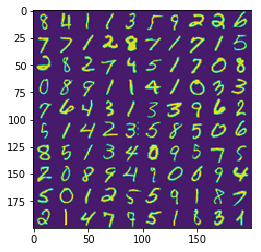

In [115]:
displayData(to_display)

In [182]:
def sigmoid(x):
    #z = np.dot(theta.transpose(), X)
    g = 1/(1 + np.exp(-x))
    return g

In [776]:
def lrCostFunction(theta, X, y, lamdba):
    J = 0
    m = y.size
    delta_J = np.zeros(X.shape[0])
    x = np.dot(theta.transpose(), X)
    b = (-y)*np.log(sigmoid(x))-(1-y)*np.log(1-sigmoid(x))
    c = lamdba/(2*m)*(np.square(theta).sum() - np.square(theta[0]))
    J = 1/m*b.sum()+c
    return J

In [777]:
def GradReg(theta, X, y, lamdba):
    J = 0
    m = y.size
    delta_J = np.zeros(X.shape[0])
    x = np.dot(theta.transpose(), X)
    tmp = (sigmoid(x) - y).transpose()
    for j in (range(1, X.shape[0]-1)):
        delta_J[j] = 1/m*(np.multiply(tmp, X[j])).sum()+(lamdba/m*theta[j])
    delta_J[0] = 1/m*(np.multiply(tmp, X[0])).sum()
    return delta_J

In [780]:
theta_t = np.array((-2, -1, 1, 2))
X_t = np.linspace(1,15, 15)
X_t = X_t.reshape(5,3)/10

X_t = np.column_stack((np.ones(5), X_t))

X_t = X_t.transpose()
y_t = np.column_stack((1,0,1,0,1))
#y_t = y_t.transpose()

a = lrCostFunction(theta_t, X_t, y_t, 3)
b = GradReg(theta_t, X_t, y_t, 3)
print(a)
print(b)


2.590000694417512
[-0.60628251 -1.02439775  0.114974    0.        ]


In [654]:
def oneVsAll(X, y, num_labels, lamdba):
    X = np.column_stack([np.ones((5000, 1)), X])
    X = X.transpose()
    thetas = np.zeros((num_labels, X.shape[0]))
    initial_theta=np.zeros(X.shape[0])
    for idx in range(1, num_labels+1):
        y_tmp = np.array([1 if (e == idx) else 0 for e in y.tolist()])
        result = opt.fmin_tnc(func=lrCostFunction, x0=initial_theta, fprime=GradReg, args=(X, y_tmp, lamdba))  
        thetas[idx-1, :] = np.array(result[0])

    return thetas

In [655]:
X = tt['X']
y = tt['y'].transpose()[0]

all_theta = oneVsAll(X, y, 10, 0.1)

In [794]:
def predictOneVsAll(all_theta, X):
    X = np.column_stack([np.ones((5000, 1)), X])
    X = X.transpose()
    h = sigmoid(np.dot(all_theta,X))
    h_argmax = np.argmax(h, axis=0)+1
    correct = [1 if a == b else 0 for (a, b) in zip(h_argmax, y)]
    accuracy = sum(correct)/ float(len(correct))
    print('accuracy = {0}%'.format(accuracy * 100))

In [795]:
p = predictOneVsAll(all_theta, X)

accuracy = 96.46000000000001%


accuracy = 96.46000000000001%


In [786]:
t = sum((map(int, correct)))

In [789]:
sum(correct)

4823